<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols, latex, S, nonlinsolve
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
from IPython.display import Latex

# Практическое занятие 16
# Компьютерный практикум по алгебре на Python
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс Parabola.

Внутренние переменные $\_p$, $\_vertex$, $\_angle$.

Реализовать **атрибуты**:

**параметр** $p$

**вершина** (vertex) в виде точки Point

**фокус** (focus) в виде точки Point

**угол angle** по умолчанию 0 для параболы с осью, параллельной OX, и ветвями, направленными вправо

**ось симметрии** (axis_symmetry) в виде прямой Line

**директриса** (directrix) в виде прямой Line

Реализовать **методы**

**equation(self)** - уравнение параболы,

**dir_equation(self)** - уравнение директрисы,

**ax_sym_equation(self**) - уравнение оси симметрии,

**rotate(self, angle)** - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой.

В конструкторе экземпляра класса  

\_\_new\_\_(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [107]:
from sympy.abc import x, y

class Parabola:
  def __init__(self, p, vertex=None, angle=None):
      self._p = p
      self._vertex = vertex if vertex else Point(0, 0)
      self._angle = angle if angle else 0

  @property
  def p(self):
    return self._p

  @p.setter
  def p(self, p):
    self._p = p

  @property
  def vertex(self):
    return self._vertex

  @vertex.setter
  def vertex(self, vertex):
    self._vertex = vertex

  @property
  def angle(self):
    return self._angle

  @angle.setter
  def angle(self, angle):
    self._angle = angle

  @property
  def focus(self):
    v = Point2D(Cos(self._angle), Sin(self._angle))
    return self._vertex + v * self._p

  @property
  def axis_symmetry(self):
    focus = self.focus
    return Line(self._vertex, focus)

  @property
  def directrix(self):
    A = Matrix([[Cos(self._angle), - Sin(self._angle)],
            [Sin(self._angle), Cos(self._angle)]])
    v = Point2D(A * sympy.Matrix([0, 1]))

    p1 = Point2D(self._vertex.x - self._p, self._vertex.y)

    return Line(p1, p1 + v)

  def equation(self):
    A = Matrix([[Cos(self._angle), - Sin(self._angle)],
            [Sin(self._angle), Cos(self._angle)]])
    X = A * Matrix([y**2 / (2 * self._p), y])

    sols = sympy.solve(sympy.Eq(x, X[0]), y)
    return [sympy.Eq(y, X[1].subs(y, sol)).subs(x, x - self._vertex.x).subs(y, y - self._vertex.y) for sol in sols]

  def dir_equation(self):
    return sympy.Eq(self.directrix.equation(x=x, y=y), 0).simplify()

  def ax_sym_equation(self):
    return sympy.Eq(self.axis_symmetry.equation(x=x, y=y), 0).simplify()

  def rotate(self, angle):
    return Parabola(self._p, vertex=self._vertex, angle=self._angle + angle)


### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы.

Изобразить на общем графике параболу, ее ось симметрии и директрису, парабола зеленая, ось симметрии красная, директриса черная.

3

Point2D(-5 + 3*sqrt(2)/2, 2 + 3*sqrt(2)/2)

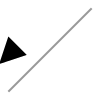

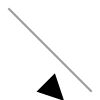

Eq(y - 2, sqrt(2)*(3 - sqrt(6*sqrt(2)*(x + 5) + 9))**2/12 + sqrt(2)*(3 - sqrt(6*sqrt(2)*(x + 5) + 9))/2)

Eq(y - 2, sqrt(2)*(sqrt(6*sqrt(2)*(x + 5) + 9) + 3)**2/12 + sqrt(2)*(sqrt(6*sqrt(2)*(x + 5) + 9) + 3)/2)

Eq(x - y, -7)

Eq(x + y, -6)

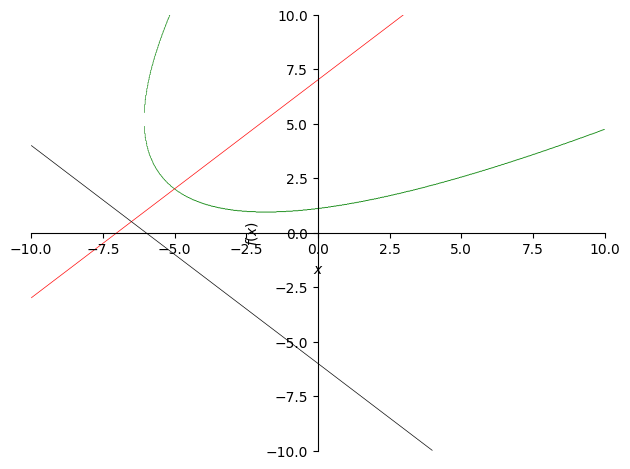

In [108]:
parabola = Parabola(3, vertex=Point2D(-5, 2), angle=Pi/4)

display(parabola.p)
display(parabola.focus)
display(parabola.axis_symmetry)
display(parabola.directrix)

display(*parabola.equation())
display(parabola.ax_sym_equation())
display(parabola.dir_equation())


plt = plot(show=False, xlim=[-10, 10], ylim=[-10,10])
for eq in parabola.equation():
  plt.extend(plot_implicit(eq, (x, -10, 10), (y, -10, 10), line_color='g', show=False))

plt.extend(plot_implicit(parabola.ax_sym_equation(), (x, -10, 10), (y, -10, 10), line_color='r', show=False))
plt.extend(plot_implicit(parabola.dir_equation(), (x, -10, 10), (y, -10, 10), line_color='k', show=False))

plt.show()